In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_absolute_percentage_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,RobustScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold,LeaveOneOut,LeavePOut,validation_curve,learning_curve
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor,StackingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge,ARDRegression,Lasso, Ridge

In [3]:
df_raw=pd.read_csv('Oxidation_ZrB2.csv')
print(df_raw.columns)
df_raw = df_raw.drop_duplicates()

Index(['ZrB2', 'SiC', 'Sinter temp', 'Sintering Time (min)',
       'Relative Density', 'Temp', 'Time@Temp (min)', 'Oxide Thickness (um)',
       'Thermal Conductivity'],
      dtype='object')


In [4]:
import pandas as pd


conditions = [
    (df_raw['Temp'] >= 1200) & (df_raw['Temp'] <1300),
    (df_raw['Temp'] >= 1300) & (df_raw['Temp'] <1400),
    (df_raw['Temp'] >= 1400) & (df_raw['Temp'] <1500),
    (df_raw['Temp'] >= 1500) & (df_raw['Temp'] <=1600)
    
]

labels = [0, 1,2,3]

# Use np.select to assign the labels based on the conditions
df_raw['Label'] = pd.Series(pd.NA, index=df_raw.index)  # Create an empty column 'Label'

df_raw['Label'] = pd.Series(
    pd.NA, dtype=pd.Int64Dtype(), index=df_raw.index
) 


df_raw['Label'] = np.select(conditions, labels, default=df_raw['Label'])
df_raw.groupby(['Label']).count()

,ZrB2,SiC,Sinter temp,Sintering Time (min),Relative Density,Temp,Time@Temp (min),Oxide Thickness (um),Thermal Conductivity
Label,,,,,,,,,
0,30,30,30,30,30,30,30,30,30
1,13,13,13,13,13,13,13,13,13
2,11,11,11,11,11,11,11,11,11
3,34,34,34,34,34,34,34,34,34


In [5]:
df_raw = df_raw.dropna(subset=['Label'])

# Convert 'Label' column to integers
df_raw['Label'] = df_raw['Label'].astype(int)

In [6]:
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE,SMOTENC,SVMSMOTE,KMeansSMOTE
ada = SVMSMOTE(random_state = 44, k_neighbors = 2)
X_res, y_res = ada.fit_resample(df_raw.iloc[:,:-1], df_raw.iloc[:,-1])

Ada_data = pd.concat([X_res, y_res], axis=1)
Ada_data = Ada_data.drop_duplicates()
Ada_data

,ZrB2,SiC,Sinter temp,Sintering Time (min),Relative Density,Temp,Time@Temp (min),Oxide Thickness (um),Thermal Conductivity,Label
0,90.000000,10.000000,2000,60,99.800000,1500.0,300.0,521.000000,67.917463,3
1,90.000000,10.000000,2000,60,99.800000,1500.0,300.0,166.000000,67.917463,3
2,90.000000,10.000000,2000,60,99.800000,1500.0,300.0,32.000000,67.917463,3
3,90.000000,10.000000,1900,20,100.000000,1450.0,1200.0,205.000000,65.920601,2
4,90.000000,10.000000,1800,5,85.000000,1400.0,180.0,145.000000,67.718832,2
...,...,...,...,...,...,...,...,...,...,...
118,85.642023,14.357977,1800,5,87.178989,1400.0,180.0,137.373540,65.493202,2
119,89.362081,10.212640,1900,21,99.923450,1450.0,1200.0,200.534567,65.743845,2
120,75.000000,15.000000,1921,45,98.200000,1450.0,1200.0,101.416232,61.757793,2
121,72.363514,27.636486,1800,5,93.818243,1400.0,180.0,114.136150,58.711834,2


In [7]:
Ada_data.groupby(['Label']).count()


,ZrB2,SiC,Sinter temp,Sintering Time (min),Relative Density,Temp,Time@Temp (min),Oxide Thickness (um),Thermal Conductivity
Label,,,,,,,,,
0,34,34,34,34,34,34,34,34,34
1,34,34,34,34,34,34,34,34,34
2,21,21,21,21,21,21,21,21,21
3,34,34,34,34,34,34,34,34,34


In [8]:
X = Ada_data[['ZrB2', 'SiC', 'Sinter temp', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Time@Temp (min)',"Thermal Conductivity" ]]

Y = Ada_data["Oxide Thickness (um)"]


In [9]:
print(X.shape)
print(Y.shape)
df_concat = pd.concat([X, Y],axis =1)


(123, 8)
(123,)


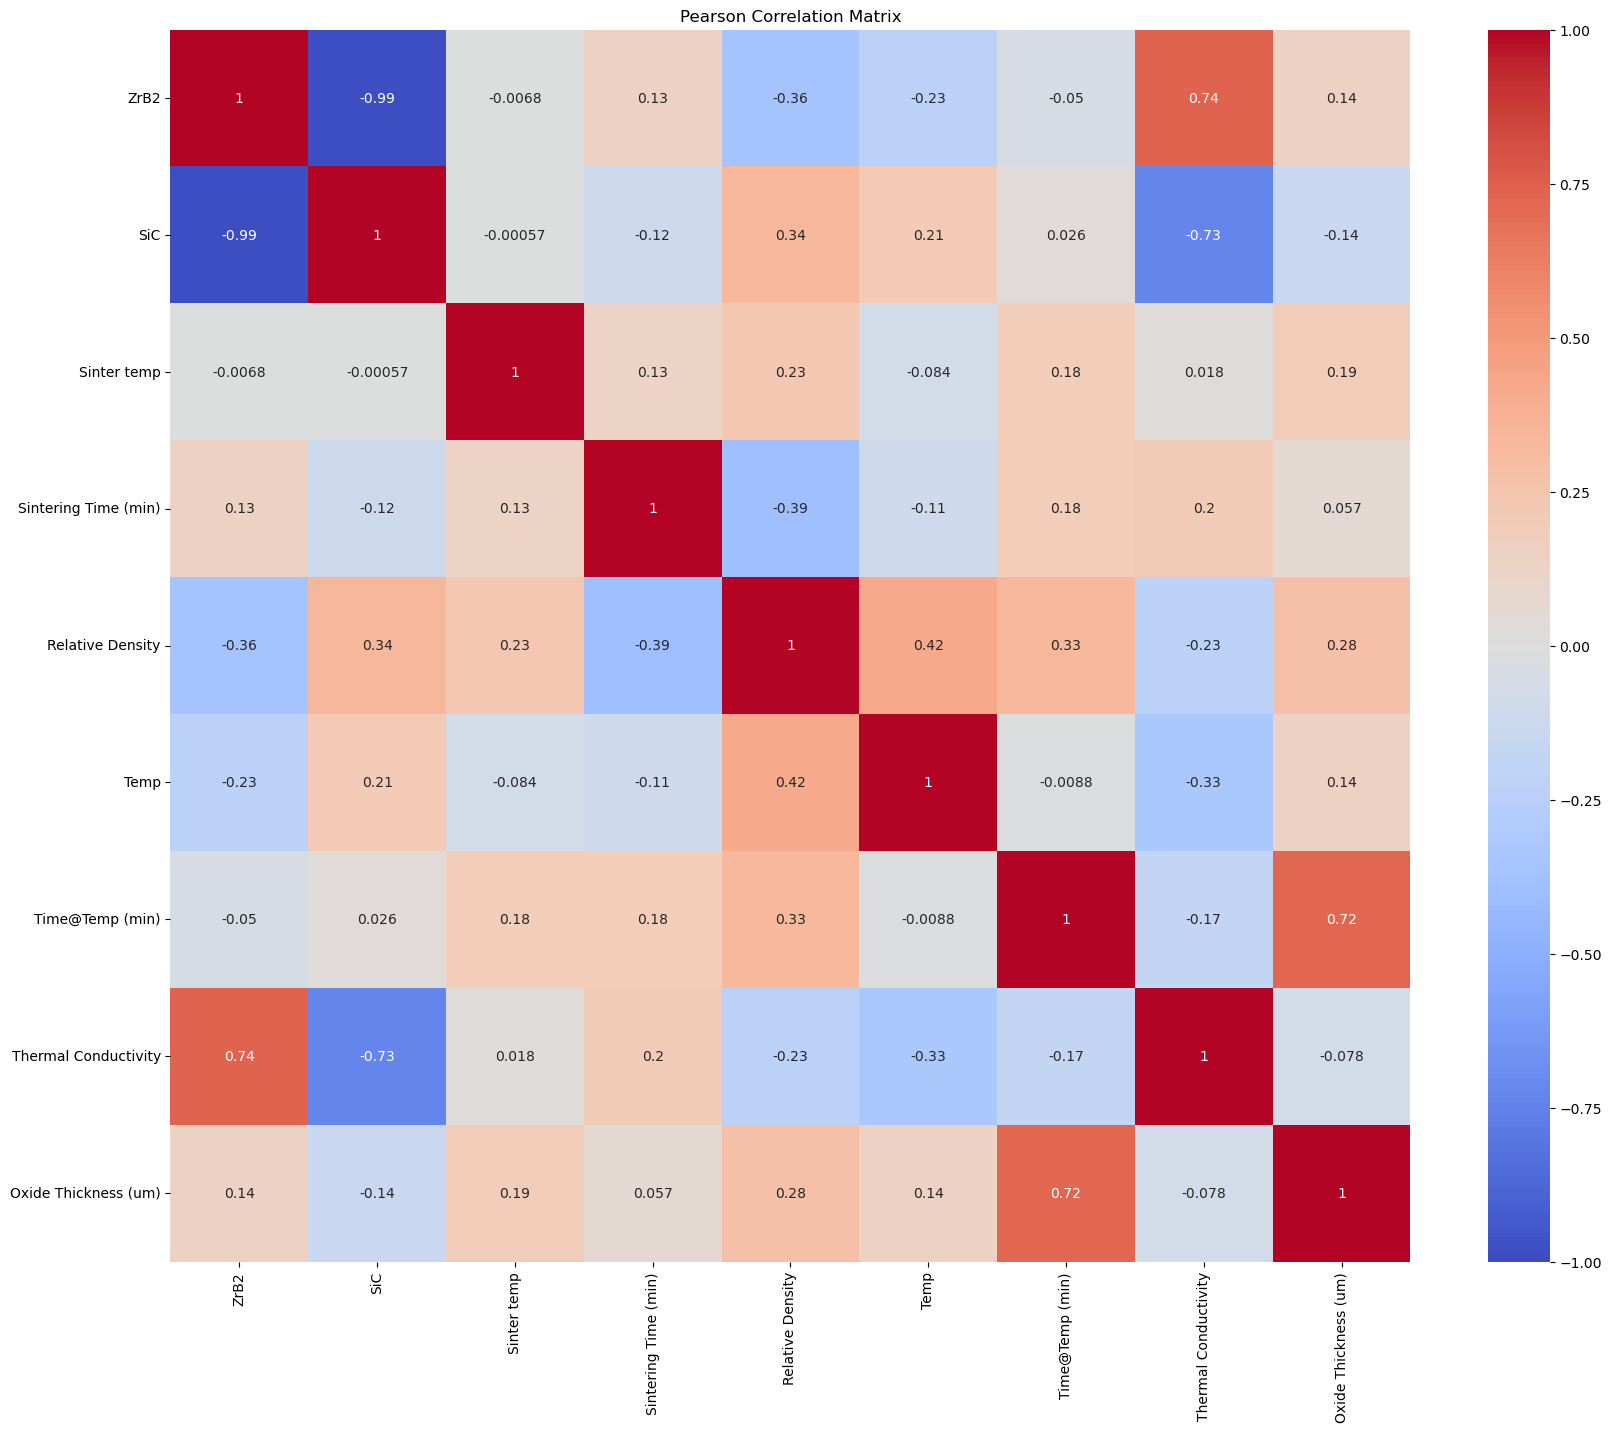

<Figure size 640x480 with 0 Axes>

In [10]:
corr_matrix = df_concat.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.show()
plt.savefig("Pearson_Correlation_Matrix.png", format='png')


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict on the testing data
y_pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 11580.118374859288
R^2 Score: 0.09810625597647193


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have already split your data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit the Random Forest Regression model
n_estimators = 100  # Number of trees in the forest
rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred1 = rf_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred1)
print("R^2 Score:", r2)
from sklearn.metrics import mean_absolute_error

# Assuming y_test1 and y_pred1 are your true and predicted target values, respectively

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred1)
print("Mean Absolute Error:", mae)

Mean Squared Error: 13059.49212843207
R^2 Score: 0.14073802943509373
Mean Absolute Error: 50.345467415127516


In [13]:
from sklearn.metrics import mean_absolute_error, r2_score

def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    """Apply selected regression model to data and measure error"""
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Predict on the testing set
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    if verbose:
        
        #print("Train MAE = {:.4f} in {}".format(train_mae, model_name))
        # print("Train R^2 = {:.4f} in {}".format(train_r2, model_name))
        #print("Test MAE = {:.4f} in {}".format(test_mae, model_name))
        print(".".format(test_r2, model_name))
        
    return model, y_test_pred, train_mae, train_r2, test_mae, test_r2

# Assuming you have a dictionary of regression models
regression_models = {
    "DecisionTree": DecisionTreeRegressor(random_state=44),
    "SVR": SVR(),
    "RandomForest": RandomForestRegressor(random_state=44),
    "XGBoost": XGBRegressor(random_state=44),
    "KRR": KernelRidge(),
    "ABR": AdaBoostRegressor(random_state=44),
    "GBR": GradientBoostingRegressor(random_state=44),
    "ETR": ExtraTreesRegressor(random_state=44),
    "KNN": KNeighborsRegressor()
}

# Iterate over the dictionary of models
for model_name, model in regression_models.items():
    _, y_test_pred, train_mae, train_r2, test_mae, test_r2 = make_regression(X_train, y_train, X_test, y_test,regression_models[model_name], model_name, verbose=True)
    print("R2 of", model_name, "=", test_r2)
    print("MAE of", model_name, "=", test_mae)
    #print("Train MAE of", model_name, "=", train_mae)
    #print("Train R2 of", model_name, "=", train_r2)


.
R2 of DecisionTree = -0.03267093003586519
MAE of DecisionTree = 52.956186478147444
.
R2 of SVR = -0.11685201159364533
MAE of SVR = 71.27669844436714
.
R2 of RandomForest = 0.1549403539116696
MAE of RandomForest = 50.72636952238119
.
R2 of XGBoost = -0.034074333291091996
MAE of XGBoost = 53.84128849985313
.
R2 of KRR = 0.045935808163052094
MAE of KRR = 57.32077179481448
.
R2 of ABR = 0.12641269274859024
MAE of ABR = 58.744214216389764
.
R2 of GBR = 0.06639579713361798
MAE of GBR = 54.97283485306558
.
R2 of ETR = 0.10294975262718653
MAE of ETR = 48.78757132452658
.
R2 of KNN = 0.21199249683047006
MAE of KNN = 53.650873401085356


Training and plotting learning curve for DecisionTree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


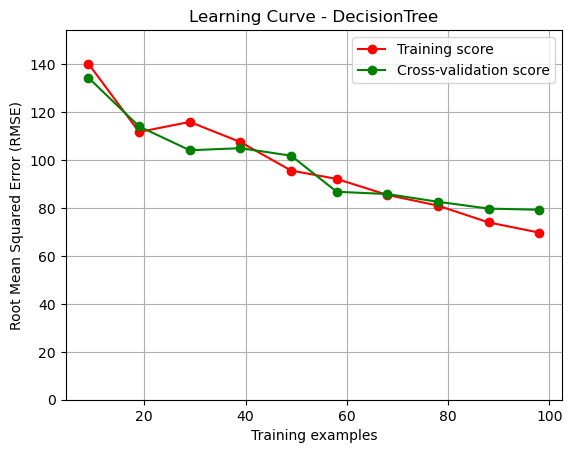

Best parameters for DecisionTree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
MAE for DecisionTree: 41.33599599612453
R^2 Score for DecisionTree: 0.5587492787047093
--------------------------------------------------
Training and plotting learning curve for RandomForest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


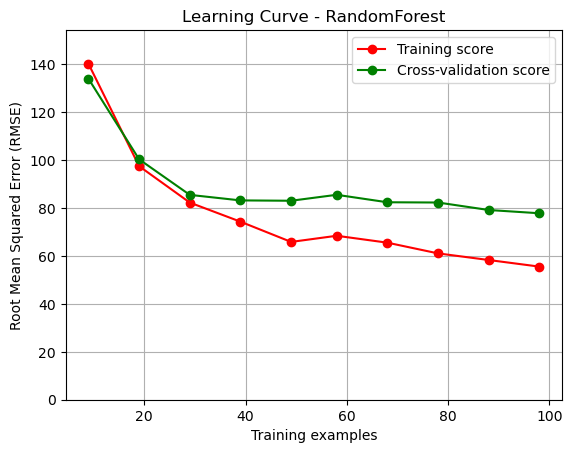

Best parameters for RandomForest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
MAE for RandomForest: 49.8653161357637
R^2 Score for RandomForest: 0.2548720827271409
--------------------------------------------------
Training and plotting learning curve for XGBoost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


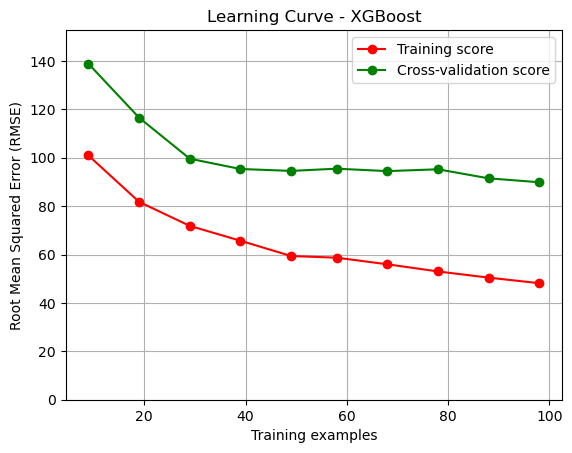

Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
MAE for XGBoost: 53.267750659060624
R^2 Score for XGBoost: 0.16870514642087497
--------------------------------------------------
Training and plotting learning curve for KRR...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instea

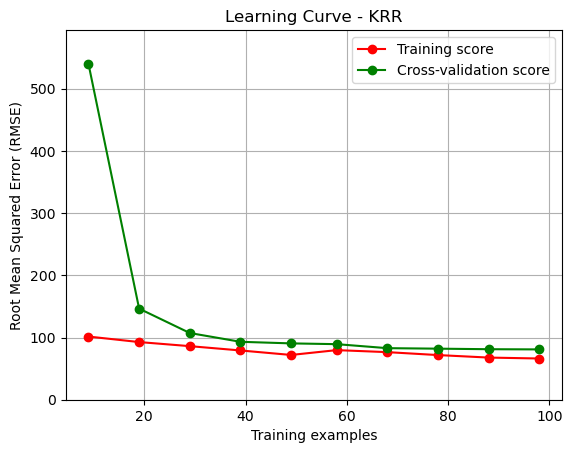

Best parameters for KRR: {'alpha': 10, 'gamma': None, 'kernel': 'linear'}
MAE for KRR: 57.32054489345462
R^2 Score for KRR: 0.04600471153959629
--------------------------------------------------
Training and plotting learning curve for ABR...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


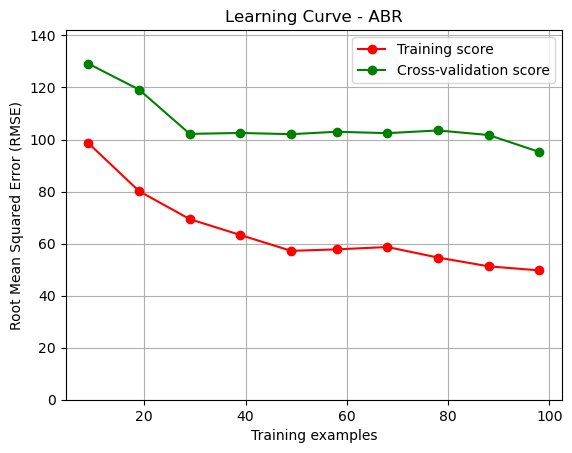

Best parameters for ABR: {'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 100}
MAE for ABR: 53.08167659959963
R^2 Score for ABR: 0.14539656837180626
--------------------------------------------------
Training and plotting learning curve for GBR...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


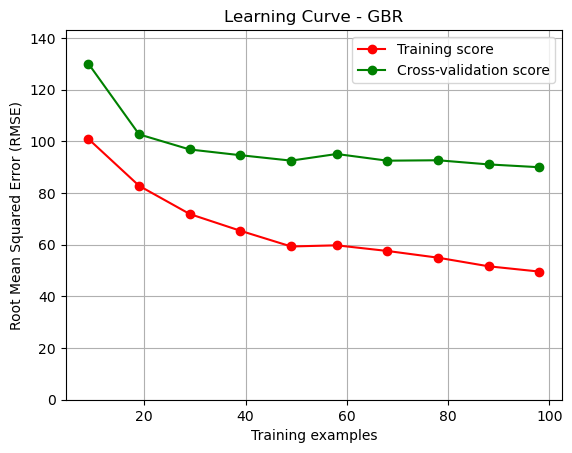

Best parameters for GBR: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
MAE for GBR: 54.86539249535519
R^2 Score for GBR: 0.17536287752262536
--------------------------------------------------
Training and plotting learning curve for ETR...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10;

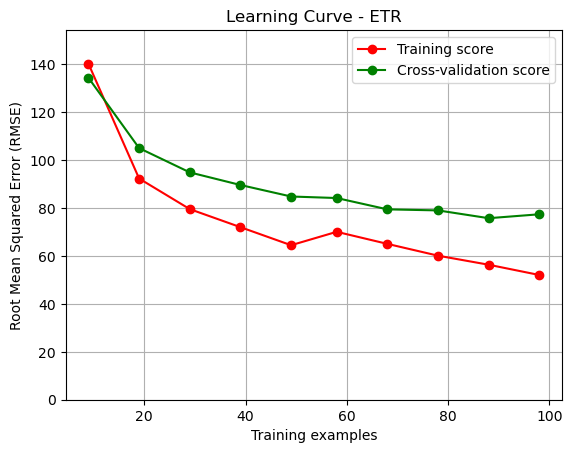

Best parameters for ETR: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
MAE for ETR: 45.88750973447412
R^2 Score for ETR: 0.33987319531162175
--------------------------------------------------
Training and plotting learning curve for KNN...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_s

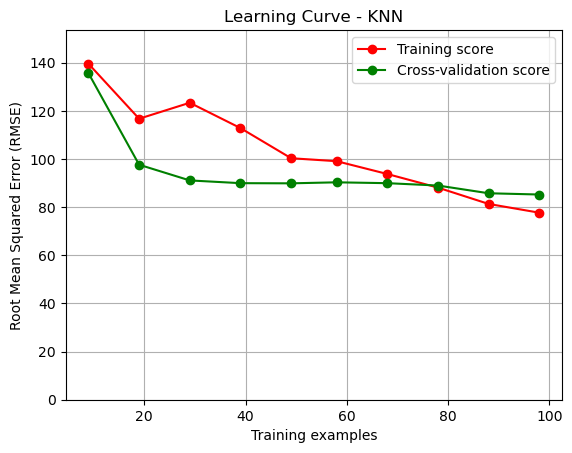

Best parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
MAE for KNN: 53.5630545403931
R^2 Score for KNN: 0.19019170800180973
--------------------------------------------------


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, KFold
from sklearn.metrics import mean_squared_error

# Ensure the correct model is imported if you are running this separately
# from sklearn.ensemble import ExtraTreesRegressor

# List of models to train
models = {
    "DecisionTree": DecisionTreeRegressor(random_state=44),
    #"SVR": SVR(),
    "RandomForest": RandomForestRegressor(random_state=44),
    "XGBoost": XGBRegressor(random_state=44),
    "KRR": KernelRidge(),
    "ABR": AdaBoostRegressor(random_state=44),
    "GBR": GradientBoostingRegressor(random_state=44),
    "ETR": ExtraTreesRegressor(random_state=44),
    "KNN": KNeighborsRegressor()
}

param_grids = {
    # Add the parameter grids as defined earlier
    "DecisionTree": {"max_depth": [None, 10, 20, 30], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]},
    #"SVR": {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'], "C": [0.1, 1, 10, 100], "gamma": ['scale', 'auto']},
    "RandomForest": {"n_estimators": [100, 200, 300], "max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]},
    "XGBoost": {"n_estimators": [100, 200, 300], "max_depth": [3, 5, 7], "learning_rate": [0.01, 0.1, 0.3], "subsample": [0.7, 0.8, 0.9]},
    "KRR": {"alpha": [0.1, 1, 10], "kernel": ['linear', 'rbf', 'poly'], "gamma": [None, 0.1, 0.01, 0.001]},
    "ABR": {"n_estimators": [50, 100, 150], "learning_rate": [0.01, 0.1, 0.3], "loss": ['linear', 'square', 'exponential']},
    "GBR": {"n_estimators": [100, 200, 300], "max_depth": [3, 5, 7], "learning_rate": [0.01, 0.1, 0.3], "subsample": [0.7, 0.8, 0.9]},
    "ETR": {"n_estimators": [100, 200, 300], "max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]},
    "KNN": {"n_neighbors": [3, 5, 7, 9], "weights": ['uniform', 'distance'], "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}
}

# Iterate over each model
for name, model in models.items():
    print(f"Training and plotting learning curve for {name}...")
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    # Best model after GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        best_model, X, Y, cv=KFold(n_splits=5, shuffle=True, random_state=42),
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    # Convert negative MSE to positive MSE
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    
    # Calculate RMSE
    train_scores_rmse = np.sqrt(train_scores_mean)
    test_scores_rmse = np.sqrt(test_scores_mean)
    
    # Plot the learning curve
    plt.figure()
    plt.title(f"Learning Curve - {name}")
    plt.xlabel("Training examples")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.grid()
    
    # Ensure the limits are finite
    ymax = max(train_scores_rmse.max(), test_scores_rmse.max())
    if np.isfinite(ymax):
        plt.ylim(0, 1.1 * ymax)
    
    # Plot training scores
    plt.plot(train_sizes, train_scores_rmse, 'o-', color="r", label="Training score")
    
    # Plot test scores
    plt.plot(train_sizes, test_scores_rmse, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()

    # Evaluate the model with the test set
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"MAE for {name}: {mae}")
    print(f"R^2 Score for {name}: {r2}")
    print("-" * 50)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mean Absolute Error: 45.88750973447412
R^2 Score: 0.33987319531162175


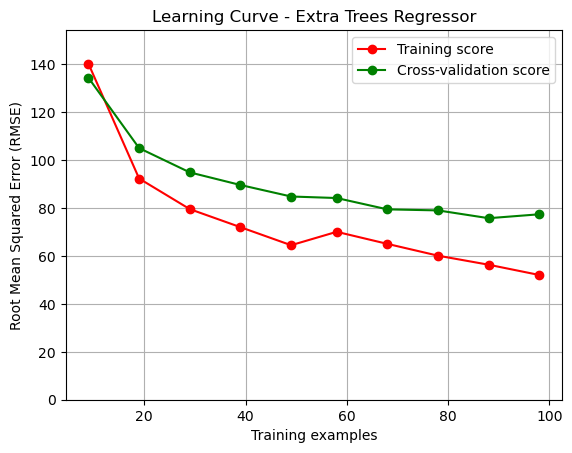

<Figure size 640x480 with 0 Axes>

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, KFold

# Define the parameter grid
param_grid_et = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]

    
}

# Initialize Extra Trees Regressor
etr = ExtraTreesRegressor(random_state =44)

# GridSearchCV for Extra Trees Regressor
best_model_1 = GridSearchCV(estimator=etr, param_grid=param_grid_et, cv=5, n_jobs=-1, verbose=2)
best_model_1.fit(X_train, y_train)
best_model = best_model_1.best_estimator_
# Predict on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

# Generate learning curve data using the best model from GridSearchCV
train_sizes, train_scores, test_scores = learning_curve(
    best_model_1.best_estimator_, X, Y, cv=KFold(n_splits=5, shuffle=True, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error', n_jobs=-1
)

# Convert negative MSE to positive RMSE
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
train_scores_rmse = np.sqrt(train_scores_mean)
test_scores_rmse = np.sqrt(test_scores_mean)

# Calculate the standard deviation for RMSE
train_scores_std = np.sqrt(np.var(-train_scores, axis=1) / train_scores.shape[1])
test_scores_std = np.sqrt(np.var(-test_scores, axis=1) / test_scores.shape[1])

# Plot the learning curve
plt.figure()
plt.title("Learning Curve - Extra Trees Regressor")
plt.xlabel("Training examples")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.grid()

# Ensure the limits are finite
ymax = max(train_scores_rmse.max(), test_scores_rmse.max())
if np.isfinite(ymax):
    plt.ylim(0, 1.1 * ymax)

# Plot training scores
plt.plot(train_sizes, train_scores_rmse, 'o-', color="r", label="Training score")

# Plot test scores
plt.plot(train_sizes, test_scores_rmse, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# Save the plot
plt.savefig("True_vs_Predicted_Values.png", format='png')


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics for each fold
mse_scores = []
mae_scores = []
r2_scores = []

# Iterate over each fold
for fold_idx, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold_idx + 1}/{num_folds}")
    
    # Split data into training and validation sets for this fold
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
   
    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)
    
    # Calculate evaluation metrics for this fold
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    
    
    # Print evaluation metrics for this fold
    print(f"  Validation R^2: {r2:.4f}")
    print(f"  Validation MSE: {mse:.4f}")
    print(f"  Validation MAE: {mae:.4f}")

# Calculate the average scores across all folds
average_mse = np.mean(mse_scores)
average_mae = np.mean(mae_scores)
average_r2 = np.mean(r2_scores)

print(f"\nAverage Validation MSE: {average_mse:.4f}")
print(f"Average Validation MAE: {average_mae:.4f}")
print(f"Average Validation R^2: {average_r2:.4f}")


Fold 1/5
  Validation R^2: 0.3399
  Validation MSE: 10032.9365
  Validation MAE: 45.8875
Fold 2/5
  Validation R^2: 0.9369
  Validation MSE: 696.7375
  Validation MAE: 19.3649
Fold 3/5
  Validation R^2: 0.7691
  Validation MSE: 5205.2097
  Validation MAE: 39.1432
Fold 4/5
  Validation R^2: 0.9197
  Validation MSE: 166.5484
  Validation MAE: 8.5085
Fold 5/5
  Validation R^2: 0.7804
  Validation MSE: 768.6138
  Validation MAE: 16.5743

Average Validation MSE: 3374.0092
Average Validation MAE: 25.8957
Average Validation R^2: 0.7492


Mean Average Error: 33.43070942012969
R^2 Score: 0.673596657023382


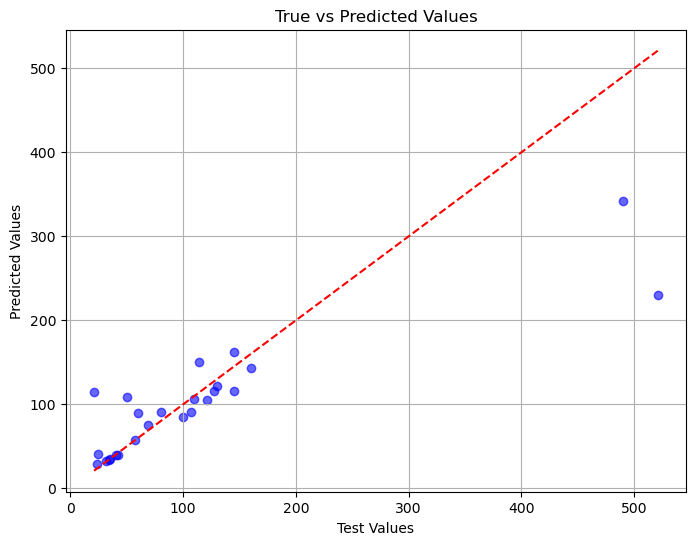

<Figure size 640x480 with 0 Axes>

In [17]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Average Error:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title('True vs Predicted Values')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.grid(True)
plt.show()
plt.savefig("True_vs_Predicted_Values.png", format='png')


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics for each fold
mse_scores = []
train_r2_scores = []
val_r2_scores = []

# Iterate over each fold
for fold_idx, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold_idx + 1}/{num_folds}")
    
    # Split data into training and validation sets for this fold
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
    
    # Fit the model to the training data
    best_model.fit(X_train, y_train)

    
    # Calculate R² score for training data
    y_pred_train = best_model.predict(X_train)
    train_r2 = r2_score(y_train, y_pred_train)
    
    train_r2_scores.append(train_r2)
   
    
    print(f"  Training R^2: {train_r2:.4f}")
    



# Calculate the average R² score across all folds for training and validation data
average_train_r2 = np.mean(train_r2_scores)
print(f"\nAverage Training R²: {average_train_r2:.4f}")



Fold 1/5
  Training R^2: 0.8305
Fold 2/5
  Training R^2: 0.7299
Fold 3/5
  Training R^2: 0.7972
Fold 4/5
  Training R^2: 0.7206
Fold 5/5
  Training R^2: 0.7523

Average Training R²: 0.7661


In [19]:
dataframe=pd.read_csv('checking4.csv')
print(dataframe.columns)

Index(['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Oxidation Test', 'Time@Temp (min)', 'Label',
       'Thermal Conductivity'],
      dtype='object')


In [20]:
x= dataframe[['ZrB2', 'SiC', 'Sinter temp', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Time@Temp (min)',"Thermal Conductivity" ]]
y_predict_oxide = best_model.predict(x)
dataframe["Oxide Thickness"] = y_predict_oxide
dataframe
dataframe.to_csv('SiC_Conc_vs_Oxide_Layer_Thickness.csv', index=False)

In [21]:
dataframe
dataframe.to_csv("check.csv")

In [22]:
dataframe


,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Label,Thermal Conductivity,Oxide Thickness
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1800,30,60,100,1500.0,1,60,4,62.826044,140.077650
1,97.5,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1800,30,60,100,1500.0,1,60,4,68.172936,149.885328
2,95.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1800,30,60,100,1500.0,1,60,4,69.698106,149.278451
3,92.5,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1800,30,60,100,1500.0,1,60,4,67.416230,156.272564
4,90.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1800,30,60,100,1500.0,1,60,4,68.397463,171.882932
5,87.5,0.0,12.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1800,30,60,100,1500.0,1,60,4,68.154110,162.129633
6,85.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1800,30,60,100,1500.0,1,60,4,68.248716,148.570646
7,82.5,0.0,17.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1800,30,60,100,1500.0,1,60,4,67.427022,110.332971
8,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1800,30,60,100,1500.0,1,60,4,66.996325,68.927973
9,77.5,0.0,22.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1800,30,60,100,1500.0,1,60,4,62.653295,63.337482


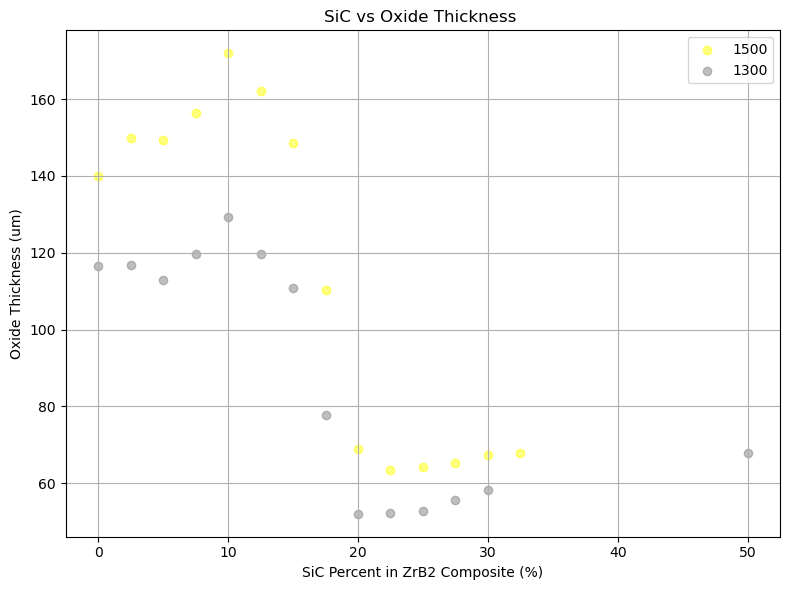

In [23]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(8, 6))


# Scatter plot for the third segment (30-44)
plt.scatter(dataframe['SiC'][0:14], dataframe['Oxide Thickness'][0:14], color='yellow', alpha=0.5, label='1500')

# Scatter plot for the fourth segment (45-59)
plt.scatter(dataframe['SiC'][16:30], dataframe['Oxide Thickness'][16:30], color='grey', alpha=0.5, label='1300')

# Add title and labels
plt.title('SiC vs Oxide Thickness ')  
plt.xlabel('SiC Percent in ZrB2 Composite (%)') 
plt.ylabel('Oxide Thickness (um)')  

# Add grid
plt.grid(True) 

# Add legend to distinguish the segments
plt.legend()

# Adjust layout
plt.tight_layout()  

# Save the plot
plt.savefig("SiC_conc_vs_Oxide_Scale_thickness.png", format='png')

# Show the plot
plt.show()
